In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv("corona.csv")


### Data visualization 

In [97]:
df.shape

(6161, 6)

In [98]:
df.head()

,gender,age_group,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,Time_between_positive_and_death
0,נקבה,85+,0.0,18.0,1.0,18.0
1,נקבה,75-84,1.0,1.0,19.0,20.0
2,זכר,85+,1.0,10.0,1.0,10.0
3,זכר,65-74,0.0,11.0,0.0,11.0
4,זכר,65-74,0.0,3.0,0.0,5.0


In [99]:
df_copy = df.copy()

In [100]:
df_copy.shape

(6161, 6)

In [101]:
df_copy.head()

,gender,age_group,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,Time_between_positive_and_death
0,נקבה,85+,0.0,18.0,1.0,18.0
1,נקבה,75-84,1.0,1.0,19.0,20.0
2,זכר,85+,1.0,10.0,1.0,10.0
3,זכר,65-74,0.0,11.0,0.0,11.0
4,זכר,65-74,0.0,3.0,0.0,5.0


### infromation

In [102]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 6 columns):
gender                                       6161 non-null object
age_group                                    6161 non-null object
Ventilated                                   6119 non-null float64
Time_between_positive_and_hospitalization    6119 non-null float64
Length_of_hospitalization                    6119 non-null float64
Time_between_positive_and_death              6160 non-null float64
dtypes: float64(4), object(2)
memory usage: 288.9+ KB


In [103]:
df_copy.describe()

,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,Time_between_positive_and_death
count,6119.000000,6119.000000,6119.000000,6160.000000
mean,0.395163,2.608923,14.054748,16.546753
std,0.488926,12.717253,16.642358,17.865495
min,0.000000,-295.000000,0.000000,-2.000000
25%,0.000000,0.000000,4.000000,7.000000
50%,0.000000,1.000000,10.000000,12.000000
75%,1.000000,5.000000,19.000000,20.000000
max,1.000000,281.000000,311.000000,324.000000


### finding the mean of the features and the target

In [104]:
m_Ventilated = np.mean(df_copy.Ventilated)
m_Time_between_positive_and_hospitalization = np.mean(df_copy.Time_between_positive_and_hospitalization)
m_Length_of_hospitalization = np.mean(df_copy.Length_of_hospitalization)
m_Time_between_positive_and_death = np.mean(df_copy.Time_between_positive_and_death)
print("The mean of Time_between_positive_and_death is:", m_Time_between_positive_and_death,"days")

The mean of Time_between_positive_and_death is: 16.546753246753248 days


In [105]:
sum(np.isnan(df_copy.Time_between_positive_and_death))

1

replace tha nan in the mean of each feture

In [106]:
for k,v in df_copy.iterrows():
    if np.isnan(v.Ventilated):
        df_copy.loc[k,"Ventilated"] = m_Ventilated
        
    if np.isnan(v.Time_between_positive_and_hospitalization):  
        df_copy.loc[k,"Time_between_positive_and_hospitalization"] = m_Time_between_positive_and_hospitalization
        
    if np.isnan(v.Length_of_hospitalization):   
        df_copy.loc[k,"Length_of_hospitalization"] = m_Length_of_hospitalization
        
    if np.isnan(v.Time_between_positive_and_death):  
        df_copy.loc[k,"Time_between_positive_and_death"] = m_Time_between_positive_and_death
        
   
        
    

### checking there is  nan in the features

In [107]:
null_Vent = sum(np.isnan(df_copy.Ventilated))
null_t_pos_and_hosp = sum(np.isnan(df_copy.Time_between_positive_and_hospitalization))
null_len_hosp = sum(np.isnan(df_copy.Length_of_hospitalization))
null_t_pos_and_death = sum(np.isnan(df_copy.Time_between_positive_and_death))
#print("sum of null: Vent, t_pos_and_hosp, len_hosp, t_pos_and_death = ".foramt null_Vent,null_t_pos_and_hosp,null_len_hosp,null_t_pos_and_death)
print([null_Vent,null_t_pos_and_hosp,null_len_hosp,null_t_pos_and_death])


[0, 0, 0, 0]


### changing categorical data into numeric

In [108]:
df_copy["age_group"].replace({"<65": 1, "65-74": 2, "75-84":3 ,"85+" : 4}, inplace=True)

In [109]:
df_copy = pd.get_dummies(df_copy,columns =["gender"],drop_first=True)

In [110]:
df_copy.head()

,age_group,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,Time_between_positive_and_death,gender_נקבה
0,4,0.0,18.0,1.0,18.0,1
1,3,1.0,1.0,19.0,20.0,1
2,4,1.0,10.0,1.0,10.0,0
3,2,0.0,11.0,0.0,11.0,0
4,2,0.0,3.0,0.0,5.0,0


In [111]:
X =df_copy.drop(["Time_between_positive_and_death"],axis =1)
X.head()

,age_group,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,gender_נקבה
0,4,0.0,18.0,1.0,1
1,3,1.0,1.0,19.0,1
2,4,1.0,10.0,1.0,0
3,2,0.0,11.0,0.0,0
4,2,0.0,3.0,0.0,0


In [112]:
df_copy_corr = df_copy.corr()
df_copy_corr

,age_group,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,Time_between_positive_and_death,gender_נקבה
age_group,1.000000,-0.339915,0.066781,-0.176456,-0.117463,0.168161
Ventilated,-0.339915,1.000000,-0.014994,0.265654,0.232080,-0.139365
Time_between_positive_and_hospitalization,0.066781,-0.014994,1.000000,-0.283026,0.444974,0.024719
Length_of_hospitalization,-0.176456,0.265654,-0.283026,1.000000,0.725837,-0.043008
Time_between_positive_and_death,-0.117463,0.232080,0.444974,0.725837,1.000000,-0.021702
gender_נקבה,0.168161,-0.139365,0.024719,-0.043008,-0.021702,1.000000


### finding correlation

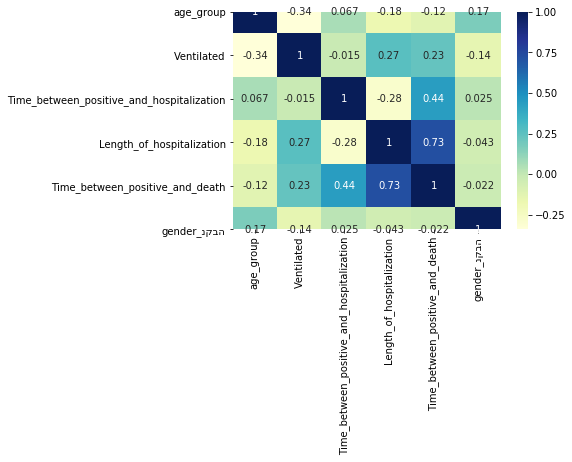

In [113]:
sns.heatmap(df_copy_corr,cmap="YlGnBu",annot=True)

there is 0.73% correlation between length Time in the hospital and Time being positive and death

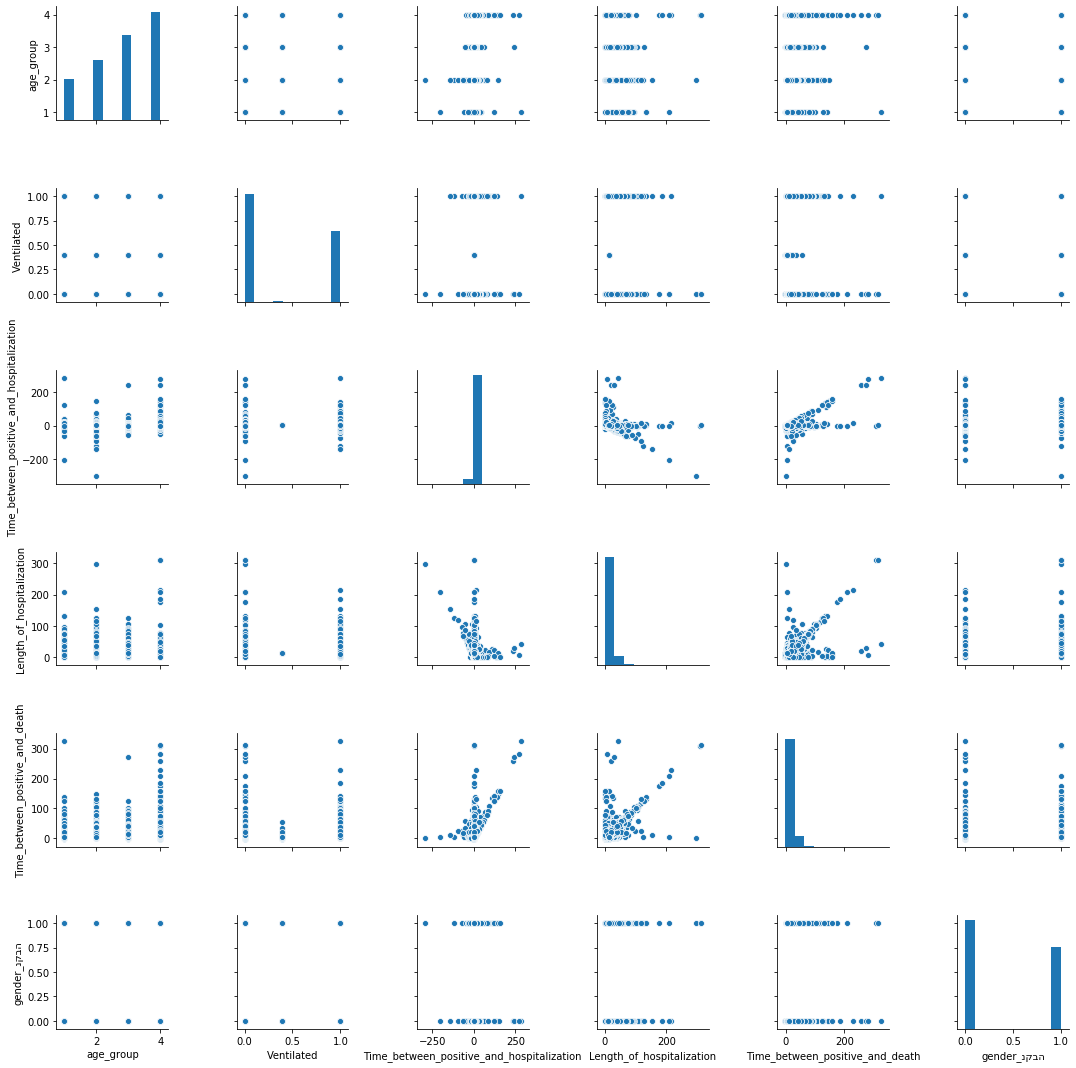

In [114]:
sns.pairplot(df_copy)

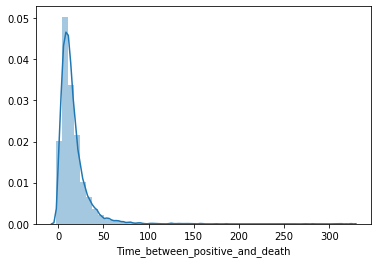

In [115]:
sns.distplot(df_copy.Time_between_positive_and_death)

the data is not normally distributed

In [116]:
logy=(np.log1p(df_copy.Time_between_positive_and_death))
logy


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       2.944439
1       3.044522
2       2.397895
3       2.484907
4       1.791759
          ...   
6156    2.772589
6157    3.218876
6158    2.397895
6159    3.044522
6160    1.791759
Name: Time_between_positive_and_death, Length: 6161, dtype: float64

In [117]:
logy = logy.replace([np.inf, -np.inf, -1], 1)


In [118]:
sum(np.isnan(logy))

1

In [119]:
np.mean(logy)

2.5467515676492356

In [120]:
df_copy["Time_between_positive_and_death"]=logy
df_copy["Time_between_positive_and_death"]
    

0       2.944439
1       3.044522
2       2.397895
3       2.484907
4       1.791759
          ...   
6156    2.772589
6157    3.218876
6158    2.397895
6159    3.044522
6160    1.791759
Name: Time_between_positive_and_death, Length: 6161, dtype: float64

In [121]:
df_copy.head()

,age_group,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,Time_between_positive_and_death,gender_נקבה
0,4,0.0,18.0,1.0,2.944439,1
1,3,1.0,1.0,19.0,3.044522,1
2,4,1.0,10.0,1.0,2.397895,0
3,2,0.0,11.0,0.0,2.484907,0
4,2,0.0,3.0,0.0,1.791759,0


In [122]:
sum(np.isnan(df_copy.Time_between_positive_and_death))

1

In [123]:
for k,v in df_copy.iterrows():
    if np.isnan(v.Time_between_positive_and_death):  
        df_copy.loc[k,"Time_between_positive_and_death"] =np.mean(logy)
        

In [124]:
sum(np.isnan(df_copy.Time_between_positive_and_death))

0

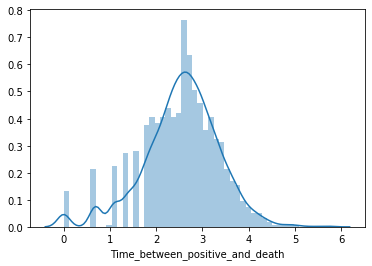

In [125]:
sns.distplot(df_copy.Time_between_positive_and_death)

now the target data is normal distribuation

In [126]:
df_copy.head()

,age_group,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,Time_between_positive_and_death,gender_נקבה
0,4,0.0,18.0,1.0,2.944439,1
1,3,1.0,1.0,19.0,3.044522,1
2,4,1.0,10.0,1.0,2.397895,0
3,2,0.0,11.0,0.0,2.484907,0
4,2,0.0,3.0,0.0,1.791759,0


In [127]:
y =df_copy[["Time_between_positive_and_death"]]
y.head()

,Time_between_positive_and_death
0,2.944439
1,3.044522
2,2.397895
3,2.484907
4,1.791759


In [128]:
X = df_copy.drop(["Time_between_positive_and_death"],axis = True)

In [129]:
X

,age_group,Ventilated,Time_between_positive_and_hospitalization,Length_of_hospitalization,gender_נקבה
0,4,0.000000,18.000000,1.000000,1
1,3,1.000000,1.000000,19.000000,1
2,4,1.000000,10.000000,1.000000,0
3,2,0.000000,11.000000,0.000000,0
4,2,0.000000,3.000000,0.000000,0
...,...,...,...,...,...
6156,3,0.000000,0.000000,15.000000,1
6157,4,0.000000,22.000000,2.000000,1
6158,2,0.000000,1.000000,9.000000,1
6159,4,0.000000,0.000000,20.000000,1


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import itertools
from sklearn.model_selection import cross_val_score

### Linear Regression

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# use standard scaler in order to bring the data to the same scale

sc_x = StandardScaler()
X_train_s = sc_x.fit_transform(X_train)
X_test_s = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train_s = sc_y.fit_transform(y_train)
y_test_s = sc_y.transform(y_test)

c_lr = LinearRegression()
# calculate the equation coefficients using 'fit' function
c_lr.fit(X_train_s, y_train)
accuracies = cross_val_score(estimator = c_lr, X = X_train_s, y = y_train, cv = 5,verbose = 1)
print("the accuarcies are:",accuracies)

y_pred_s = c_lr.predict(X_test_s) 
y_pred = np.expm1(y_test)
# returns r2
print('The Score is : %.4f' % c_lr.score(X_test_s, y_test))

the accuarcies are: [0.63768987 0.52351895 0.54833285 0.62173133 0.5370312 ]
The Score is : 0.6277


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### DTRegressor

In [132]:
import pandas as pd
import seaborn as sb
import sklearn.linear_model as skl
import sklearn.tree as skt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

In [135]:
dtree = skt.DecisionTreeRegressor()

In [136]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [137]:
dtree.score(X_train,y_train)

0.9759373103499819

In [138]:
dtree.score(X_test,y_test)

0.9546961496148715

In [139]:
y_1 = dtree.predict(X_test)

### Max Depth 10

In [140]:
dtree_10 = skt.DecisionTreeRegressor(max_depth=10)

In [141]:
dtree_10.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [142]:
dtree_10.score(X_train,y_train)

0.9703765718379181

In [143]:
dtree_10.score(X_test,y_test)

0.963619183005652

In [144]:
y_2 = dtree_10.predict(X_test)

### Max Depth 5

In [145]:
dtree_5 = skt.DecisionTreeRegressor(max_depth=5)

In [146]:
dtree_5.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [147]:
dtree_5.score(X_train,y_train)

0.891638443472292

In [148]:
dtree_5.score(X_test,y_test)

0.8811751430428931

In [149]:
y_3 = dtree_5.predict(X_test)

### Max Depth 4


In [150]:
dtree_4 = skt.DecisionTreeRegressor(max_depth=4)

In [151]:
dtree_4.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [152]:
dtree_4.score(X_train,y_train)

0.8292205370469199

In [153]:
dtree_4.score(X_test,y_test)

0.8208751071316649

In [154]:
y_4 = dtree_4.predict(X_test)

i took the model with max depth = 5

In [155]:
import matplotlib.pyplot as plt

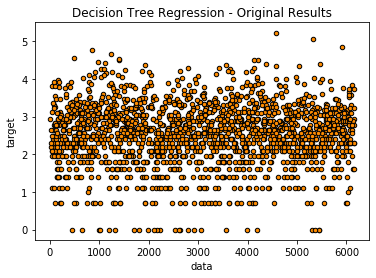

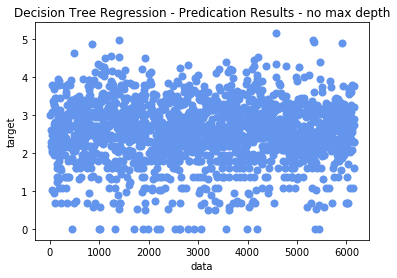

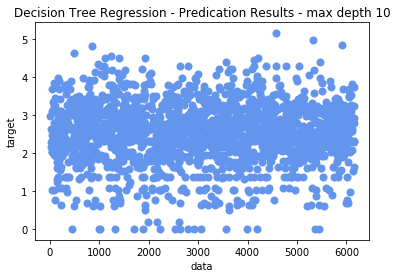

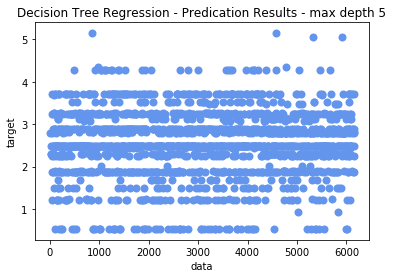

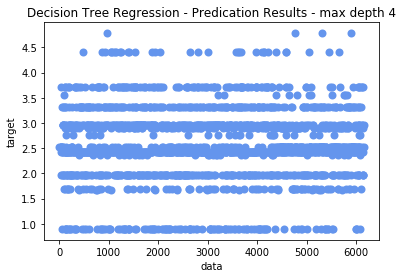

In [156]:
# Plot the results
plt.figure()
plt.scatter(X_test.index, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression - Original Results")
plt.show()

plt.figure()
plt.scatter(X_test.index, y_1, color="cornflowerblue",
         label="max_depth=None", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression - Predication Results - no max depth")
plt.show()

plt.figure()
plt.scatter(X_test.index, y_2, color="cornflowerblue",
         label="max_depth=None", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression - Predication Results - max depth 10")
plt.show()


plt.figure()
plt.scatter(X_test.index, y_3, color="cornflowerblue",
         label="max_depth=None", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression - Predication Results - max depth 5")
plt.show()


plt.figure()
plt.scatter(X_test.index, y_4, color="cornflowerblue",
         label="max_depth=None", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression - Predication Results - max depth 4")
plt.show()




